# Geographical Data Mapping

## Usage of basic mapping functions and Python libraries to map Santiago de Cali neighborhoods using shapefiles

__Ricardo Hincapie - Software Developer__

In [1]:
pip install pyshp

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import shapefile as shp # Here it imports the pyshp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))
%matplotlib inline

In [4]:
shp_path = "Barrios_Cali/Barrios.shp"
sf = shp.Reader(shp_path, encoding="latin1") # The key here is the encoding

In [5]:
len(sf.shapes()) # How many rows the dataset has

337

In [6]:
 sf.records()[0] # Example of a datapoint

Record #0: ['0610', 'Ciudadela Floralia', 805810.0, 4110.0]

In [7]:
sf.records()[0][1] # Example of a position inside a datapoint

'Ciudadela Floralia'

### Documentation for this is at:

https://pypi.org/project/pyshp/#reading-shapefiles

Tutorial Followed: https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f

-------------------------------------------------------------------------------------------------------------------

In [8]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:] # We take the column names
    records = sf.records()
    print('---- This are the fields ----\n', fields)
    print('---- This are the records ----\n', records[0])
    shps = [s.points for s in sf.shapes()]
    print('---- This are the shapes ----\n', shps[0])
    df = pd.DataFrame(columns=fields, data=records)  # Create data structure
    df = df.assign(coords=shps)  # Adds a new column callesd coords from shps data
    return df

In [9]:
df = read_shapefile(sf) #Executes the above method. WE ARE ON PANDAS!
print("\n\n---- dataframe: (number of neighborhoods, number of columns) ----\n")
df.shape

---- This are the fields ----
 ['id_barrio', 'barrio', 'area', 'perimetro']
---- This are the records ----
 Record #0: ['0610', 'Ciudadela Floralia', 805810.0, 4110.0]
---- This are the shapes ----
 [(1065621.11467656, 878387.971083927), (1065599.28807695, 878370.21563519), (1065557.48383373, 878343.757278813), (1065541.31479917, 878335.579845556), (1065511.44624924, 878320.473929652), (1065454.82531173, 878296.661417836), (1065409.31689446, 878277.082240302), (1065365.92514759, 878260.148899185), (1065344.75844175, 878246.919719725), (1065324.65007116, 878229.457198711), (1065315.76674618, 878215.30968656), (1065310.36254466, 878206.702998515), (1065271.00901726, 878136.653743177), (1065257.44577973, 878112.511188116), (1065226.75405596, 878049.540254852), (1065225.06744007, 878047.034426412), (1065208.23318813, 878022.023546513), (1065191.29982324, 877999.269345921), (1065168.54561412, 877973.869309567), (1065152.14141683, 877952.173443579), (1065129.9163753, 877927.30257412), (10651

(337, 5)

In [10]:
df.sample(3) # Random sample of the dataset

,id_barrio,barrio,area,perimetro,coords
236,1102,Maracaibo,46651.3,866.3,"[(1062403.58837313, 869895.775529297), (106240..."
132,0305,Los Libertadores,185287.0,2222.0,"[(1059768.39965129, 872499.503150791), (105981..."
219,1001,El Dorado,155725.0,1614.0,"[(1061149.0828529, 869761.407413481), (1061144..."


In [11]:
df[df.barrio == 'Cristóbal Colón'] # Search for an specific data

,id_barrio,barrio,area,perimetro,coords
200,1009,Cristóbal Colón,519877.0,4658.0,"[(1061094.15960647, 870836.413560031), (106118..."


In [12]:
df.barrio # Shows a sample of barrio column

0                         Ciudadela Floralia
1                       Brisas de Los Alamos
2      Área en Desarrollo - Parque del Amor
3                      Urbanización La Flora
4                             Altos de Menga
                       ...                  
332                           Club Campestre
333                    Urbanización Rio Lili
334                      Parcelaciones Pance
335             Villa del Prado - El Guabito
336                         Puerto Mallarino
Name: barrio, Length: 337, dtype: object

In [13]:
### Function to plot a specific shape

In [14]:
def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure() # This is the figure object based to handle axes and the canvas
    ax = plt.axes() # The region of the image with the data space
    ax.set_aspect('equal') # Sets the aspect of axes scaling
    shape_ex = sf.shape(id) # Reads from shapefile using its index. NOT function arg(!)
    x_lon = np.zeros((len(shape_ex.points),1)) # Creates an array of zeros
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0] # Populates the array with the first element of the coordinates tuple
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) # Plots x vs y as lines and/or markers
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=15)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2]) # Sets the X limit with the first and third(the x's) data of bbox
    return x0, y0 # Returns the mean points for the plot

(1061444.3878764473, 870363.73757686)

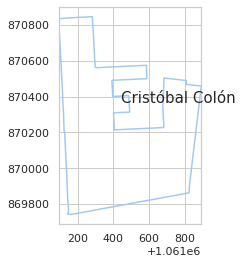

In [15]:
plot_shape(200, 'Cristóbal Colón')

In [16]:
sf.shape(0)

In [17]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,17)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize) #Figsise (float, float)
    id=0
    for shape in sf.shapeRecords():  # shapeRecords() allows to get the geometry and attributes
        x = [i[0] for i in shape.shape.points[:]]  # All x points 
        y = [i[1] for i in shape.shape.points[:]]  # All y points
        plt.plot(x, y, 'k')
        
        if (x_lim != None) & (y_lim != None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            if (x0 < x_lim[1]) & (x0 > x_lim[0]) \
                & (y0 < y_lim[1]) & (y0 > y_lim[0]):  # Print only those inside my borders
                plt.text(x0, y0, sf.records()[id][1], fontsize=7)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

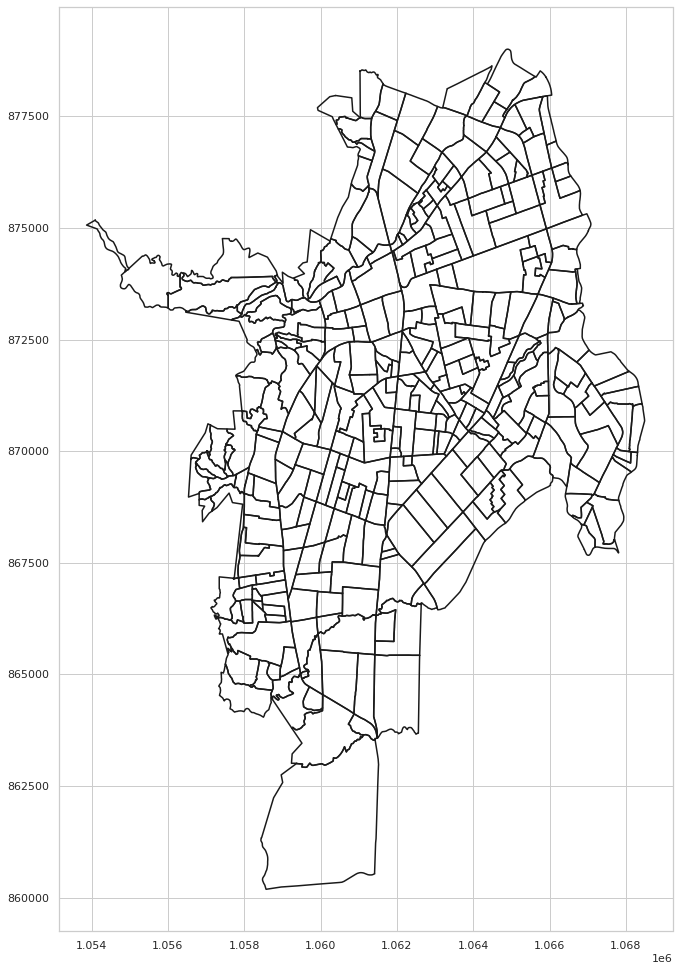

In [18]:
plot_map(sf)

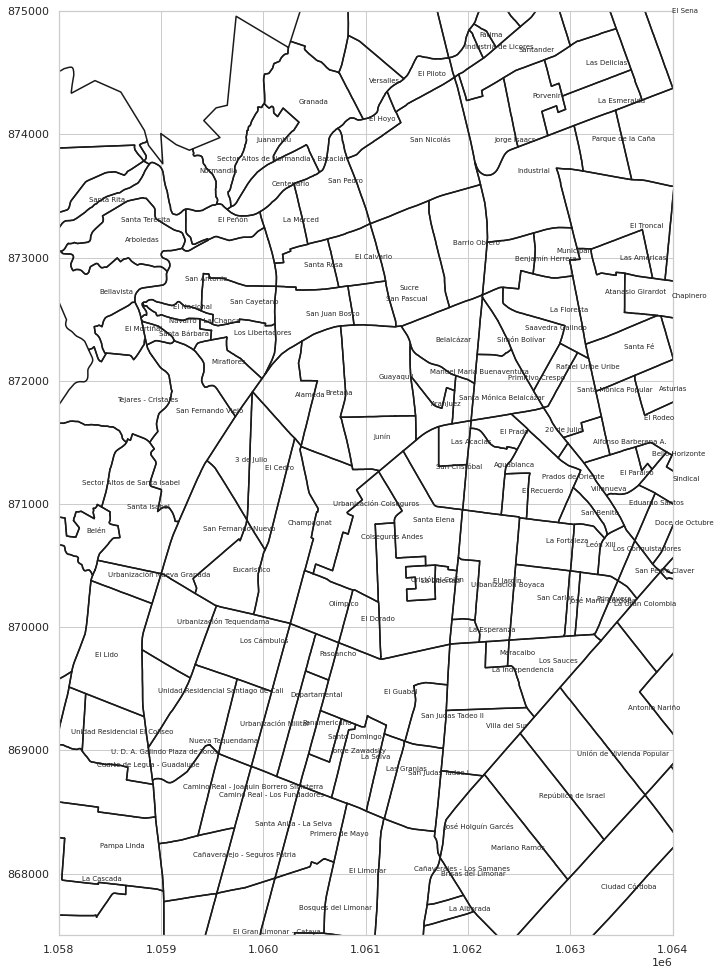

In [19]:
y_lim = (867500, 875000)
x_lim = (1058000, 1064000)
plot_map(sf, x_lim, y_lim)

In [20]:
def plot_map2(id, sf, x_lim = None, y_lim = None, figsize=(11,17)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize=figsize)
    name_guide = 0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        x0 = np.mean(x)
        y0 = np.mean(y)
        if (x0 < x_lim[1]) & (x0 > x_lim[0]) \
            & (y0 < y_lim[1]) & (y0 > y_lim[0]):
            plt.text(x0, y0, sf.records()[name_guide][1], fontsize=7)
        name_guide = name_guide+1
        
    shape_ex = sf.shape(id) # We take the ID 
    x_lon = np.zeros((len(shape_ex.points), 1))
    y_lat = np.zeros((len(shape_ex.points), 1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0] # Ip takes the tuple, and populates its first element
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon, y_lat, 'b', linewidth=3)
    if (x_lim != None) & (y_lim != None):
        plt.xlim(x_lim)
        plt.ylim(y_lim)            

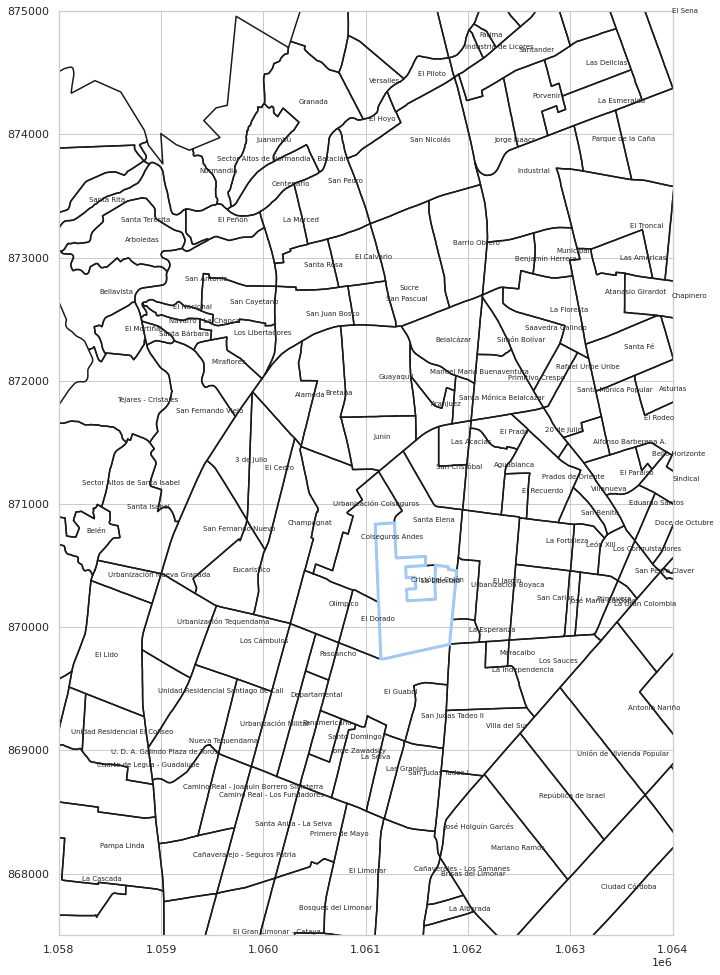

In [21]:
plot_map2(200, sf, x_lim, y_lim)

In [28]:
def plot_map_fill(id, sf,
                      x_lim = None,
                      y_lim = None, 
                      figsize=(11,17),
                      color = 'b'):
    '''
    Plot map with filled in lim coord
    '''
    plt.figure(figsize=figsize)
    fig, ax = plt.subplots(figsize = figsize) # This changes
    ax.set_title('Cali\'s map with filled N/hood')
    name_guide = 0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
        x0 = np.mean(x)
        y0 = np.mean(y)
        if (x0 < x_lim[1]) & (x0 > x_lim[0]) \
            & (y0 < y_lim[1]) & (y0 > y_lim[0]):
            ax.text(x0, y0, sf.records()[name_guide][1], fontsize=7)
        name_guide = name_guide+1
        
    shape_ex = sf.shape(id) # We take the ID 
    x_lon = np.zeros((len(shape_ex.points), 1))
    y_lat = np.zeros((len(shape_ex.points), 1))
    
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0] # Ip takes the tuple, and populates its first element
        y_lat[ip] = shape_ex.points[ip][1]
    ax.fill(x_lon, y_lat, color)  # Fill method
    
    if (x_lim != None) & (y_lim != None):
        plt.xlim(x_lim)
        plt.ylim(y_lim)

<Figure size 792x1224 with 0 Axes>

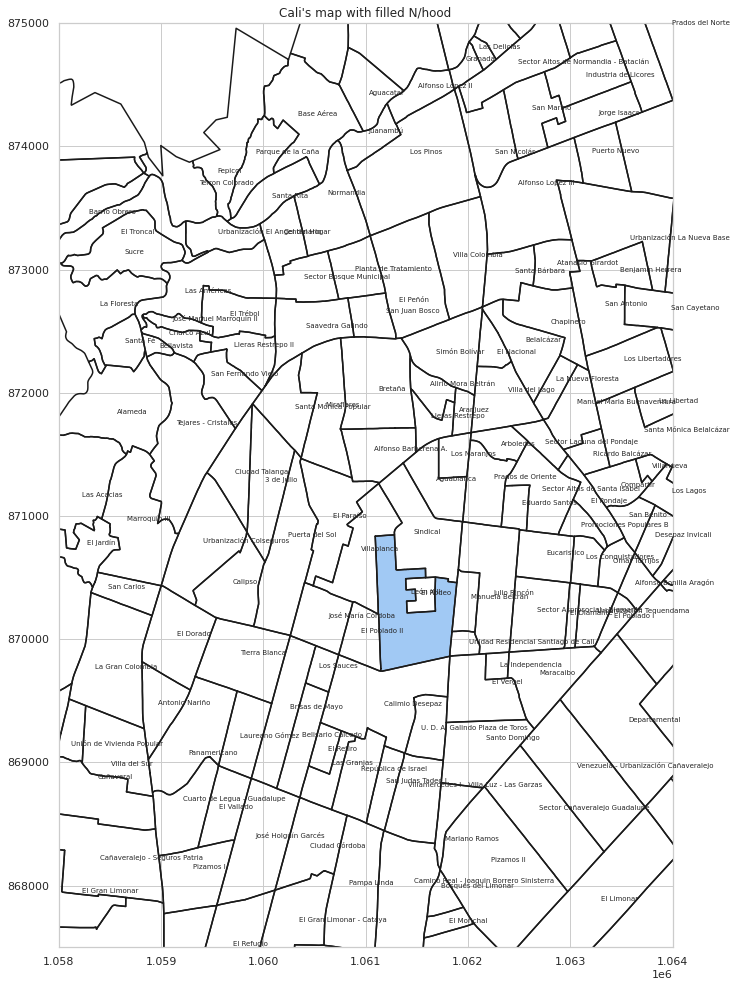

In [29]:
plot_map_fill(200, sf, x_lim, y_lim)

In [56]:
def plot_map_fill_multiple_ids (title, neighb, sf,
                                x_lim = None,
                                y_lim = None, 
                                figsize=(11,17),
                                color = 'b'):
    '''
    Plot map with multiple filled in lim coord
    '''
    plt.figure(figsize=figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=18)
    name_guide = 0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
        x0 = np.mean(x)
        y0 = np.mean(y)
        if (x0 < x_lim[1]) & (x0 > x_lim[0]) \
            & (y0 < y_lim[1]) & (y0 > y_lim[0]):
            ax.text(x0, y0, sf.records()[name_guide][1], fontsize=7)
        name_guide = name_guide+1
    
    for my_id in neighb:
        shape_ex = sf.shape(my_id)
        x_lon = np.zeros((len(shape_ex.points), 1))
        y_lat = np.zeros((len(shape_ex.points), 1))

        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0] # Ip takes the tuple, and populates its first element
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon, y_lat, color)
    
    if (x_lim != None) & (y_lim != None):
        plt.xlim(x_lim)
        plt.ylim(y_lim)

<Figure size 792x1224 with 0 Axes>

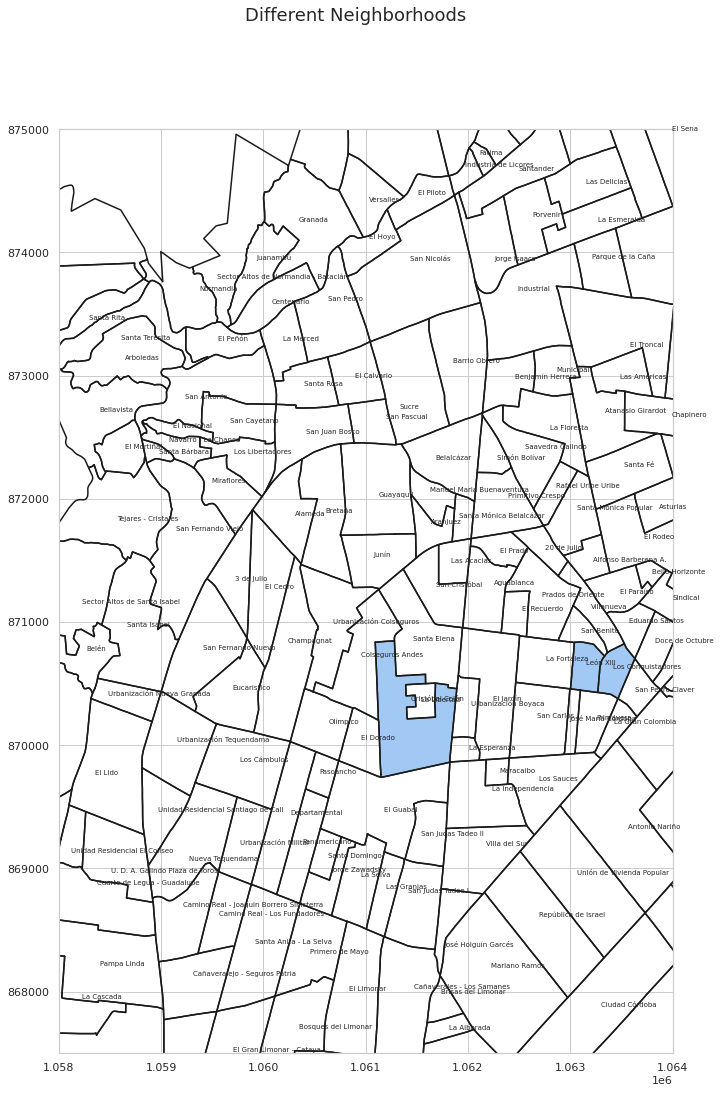

In [39]:
neighb_ids = [200, 201, 202, 203, 204]
plot_map_fill_multiple_ids("Different Neighborhoods", 
                            neighb_ids, sf, x_lim, y_lim, color = 'b')

## My solution for Multiple Names

In [44]:
def plot_map_fill_multiple_names (title, neighb, sf,
                                x_lim = None,
                                y_lim = None, 
                                figsize=(11,17),
                                color = 'b'):
    '''
    Plot map with multiple filled in lim coord
    '''
    plt.figure(figsize=figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=18)
    name_guide = 0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
        x0 = np.mean(x)
        y0 = np.mean(y)
        if (x0 < x_lim[1]) & (x0 > x_lim[0]) \
            & (y0 < y_lim[1]) & (y0 > y_lim[0]):
            ax.text(x0, y0, sf.records()[name_guide][1], fontsize=7)
        name_guide = name_guide+1
    
    names_id = []
    record_id = 0
    for record in range(len(sf.shapes())):
        for names in neighb:
            if sf.records()[record_id][1] == names:
                names_id.append(record_id)
                break
        record_id = record_id+1

    for my_id in names_id:
        shape_ex = sf.shape(my_id)
        x_lon = np.zeros((len(shape_ex.points), 1))
        y_lat = np.zeros((len(shape_ex.points), 1))

        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0] # Ip takes the tuple, and populates its first element
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon, y_lat, color)
    
    if (x_lim != None) & (y_lim != None):
        plt.xlim(x_lim)
        plt.ylim(y_lim)

<Figure size 792x1224 with 0 Axes>

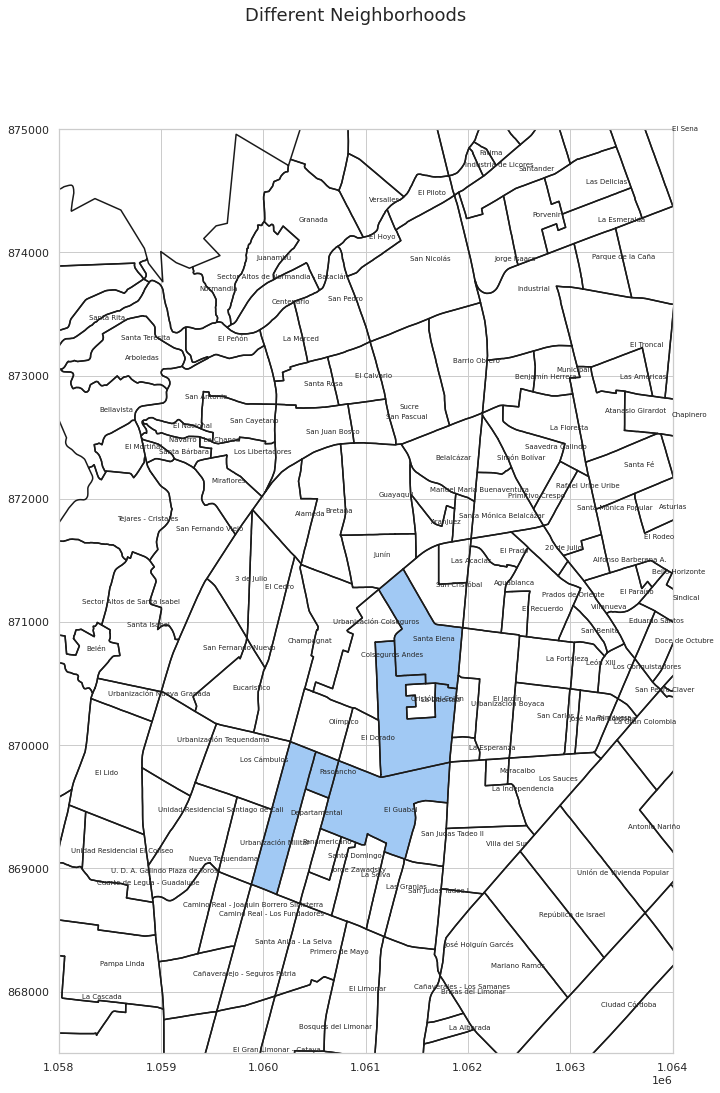

In [46]:
name_neigh = ["Cristóbal Colón", "Pasoancho", "Departamental", "El Guabal", "Santa Elena"]
data_neigh = [100, 500, 300, 1000, 700]  # Data for heat map
plot_map_fill_multiple_names("Different Neighborhoods", 
                            name_neigh, sf, x_lim, y_lim, color = 'b')

## Marcelo's solution

In [61]:
def plot_comunas_2(sf, title, neighb, x_lim, y_lim, color):
    '''
    Plot map with selected comunes, using specific color
    '''
    
    df = read_shapefile(sf)
    neighb_id = []
    for i in neighb:
        neighb_id.append(df[df.barrio == i].index[0])
    plot_map_fill_multiple_ids(title, neighb_id, sf, 
                                       x_lim, 
                                       y_lim, 
                                       figsize = (11,17), 
                                       color = color);

---- This are the fields ----
 ['id_barrio', 'barrio', 'area', 'perimetro']
---- This are the records ----
 Record #0: ['0610', 'Ciudadela Floralia', 805810.0, 4110.0]
---- This are the shapes ----
 [(1065621.11467656, 878387.971083927), (1065599.28807695, 878370.21563519), (1065557.48383373, 878343.757278813), (1065541.31479917, 878335.579845556), (1065511.44624924, 878320.473929652), (1065454.82531173, 878296.661417836), (1065409.31689446, 878277.082240302), (1065365.92514759, 878260.148899185), (1065344.75844175, 878246.919719725), (1065324.65007116, 878229.457198711), (1065315.76674618, 878215.30968656), (1065310.36254466, 878206.702998515), (1065271.00901726, 878136.653743177), (1065257.44577973, 878112.511188116), (1065226.75405596, 878049.540254852), (1065225.06744007, 878047.034426412), (1065208.23318813, 878022.023546513), (1065191.29982324, 877999.269345921), (1065168.54561412, 877973.869309567), (1065152.14141683, 877952.173443579), (1065129.9163753, 877927.30257412), (10651

<Figure size 792x1224 with 0 Axes>

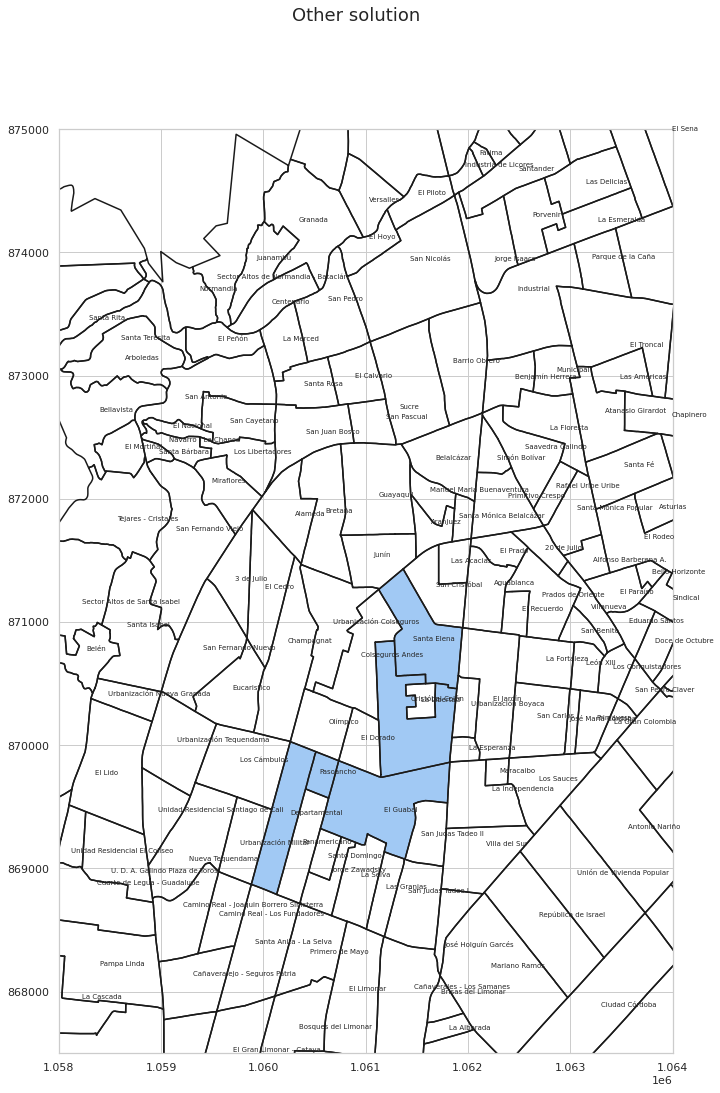

In [62]:
plot_comunas_2(sf, 'Other solution', name_neigh, x_lim, y_lim, 'b')

In [ ]:
def calc_color(data, color=None):
        if color   == 1: 
            color_sq = ['#dadaebFF','#bcbddcF0','#9e9ac8F0',
                        '#807dbaF0','#6a51a3F0','#54278fF0']; 
            colors = 'Purples';
        elif color == 2: 
            color_sq = ['#c7e9b4','#7fcdbb','#41b6c4',
                        '#1d91c0','#225ea8','#253494']; 
            colors = 'YlGnBu';
        elif color == 3: 
            color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd',
                        '#969696','#636363','#252525']; 
            colors = 'Greys';
        elif color == 9: 
            color_sq = ['#ff0000','#ff0000','#ff0000',
                        '#ff0000','#ff0000','#ff0000']
        else:
            color_sq = ['#ffffd4','#fee391','#fec44f',
                        '#fe9929','#d95f0e','#993404']; 
            colors = 'YlOrBr';
        
        new_data, bins = pd.qcut(data, 6, retbins=True, 
        labels=list(range(6)))  # Puts data in different bins
        print(new_data)
        print(bins)
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6) #Returns a list of colors called colors with 6 colors
            sns.palplot(colors, 0.6); # Prints the 'colors' palette
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1), end =" ")
            print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;

In [ ]:
def plot_comunas_data(sf, title, comunas, data=None, 
                      color=None, print_id=False):
    '''
    Plot map with selected comunes, using specific color
    '''
    
    color_ton, bins = calc_color(data, color)  # Breaks data in bins assigned with a color
    print(color_ton)
    print(bins)
    df = read_shapefile(sf)
    comuna_id = []
    for i in comunas:
        i = conv_comuna(i).upper()
        comuna_id.append(df[df.NOM_COMUNA == 
                            i.upper()].index.get_values()[0])
    plot_map_fill_multiples_ids_tone(sf, title, comuna_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9));

In [ ]:
def plot_map_fill_multiples_ids_tone(sf, title, comuna,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    
    for shape in sf.shapeRecords():  # Prints all shapes
            x = [i[0] for i in shape.shape.points[:]]
            y = [i[1] for i in shape.shape.points[:]]
            ax.plot(x, y, 'k')
            
    for id in comuna:  # Prints specific colors
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[comuna.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            plt.text(x0, y0, id, fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)